# Introduction

[Grid](../pyapi/grid.rst) offers the capability for setting numerical grids designed for integrating, interpolating, and differentiating functions of one or more variables. While it remains versatile as a general-purpose tool for numerical integration, the primary focus of Grid is to fulfill requirements of computational and conceptual density functional theory problems being operations are centered around constructing atom-centered (Becke-Lebedev-type) grids.

The package provides mainly six types of grids, that cover the most common use cases:
1. [One-dimensional grids](../pyapi/grid.onedgrid.rst) for integrating along a line. Grid offers many different quadratures for one-dimensional integration in some interval $[-1, 1]$ or on the positive-infinite strip $[0, \infty)$. These are generally employed with a transformation to the $[0, \infty)$ interval and latter used as radial grids for constructing atomic grids.

Short example:

In [25]:
from grid.onedgrid import GaussChebyshev
from grid.rtransform import BeckeRTransform

# Set up grid for 1D integration on [-1,1] using Gauss-Chebyshev quadrature rule
# -------------------------------------
npoints = 31
# Gauss-Chebyshev
gaus_cheb = GaussChebyshev(npoints)

print(f"The integration grid is defined on {gaus_cheb.domain} for the Gauss-Chebyshev quadrature rule.")

# Transform grid interval to [0,\infty)
# -------------------------------------
radial_grid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(gaus_cheb)

print(f"The integration grid is defined on {radial_grid.domain} after the Becke radial transformation.")


The integration grid is defined on (-1, 1) for the Gauss-Chebyshev quadrature rule.
The integration grid is defined on (0.0, 1e+16) after the Becke radial transformation.


2. [Angular grids](../pyapi/grid.angular.rst) for integrating the angular coordinates of a spherical system. Two types of angular grids are provided: Lebedev-Laikov and symmetric spherical t-design. These are generally used in combination with a radial grid to construct atomic grids.

Short example:

In [26]:
from grid.angular import AngularGrid

degree = 6
print(f"Maximum wanted degree of spherical harmonics that the angular grid can integrate is: {degree}", end="\n\n")

# Lebedev-Laikov grid
# The closest degree to a specified degree is found:
ang_grid = AngularGrid(degree=degree)
print(f"Actual maximum degree of spherical harmonics the Lebedev-Laikov grid can integrate is {ang_grid.degree}")
print(f"Number of points on the Lebedev-Laikov grid is {ang_grid.size}", end="\n\n")

# symmetric spherical t-design grid
ang_grid = AngularGrid(degree=degree, use_spherical=True)
print(f"Actual maximum degree of spherical harmonics the spherical t-design grid can integrate is {ang_grid.degree}")
print(f"Number of points on the spherical t-design grid is {ang_grid.size}")


Maximum wanted degree of spherical harmonics that the angular grid can integrate is: 6

Actual maximum degree of spherical harmonics the Lebedev-Laikov grid can integrate is 7
Number of points on the Lebedev-Laikov grid is 26

Actual maximum degree of spherical harmonics the spherical t-design grid can integrate is 7
Number of points on the spherical t-design grid is 32


3. [Atomic grids](../pyapi/grid.atomgrid) for integrating functions centered on an atom. These are composed of a radial grid and an angular grid and span over the whole space.

Short example:

In [27]:
from grid.atomgrid import AtomGrid

# Set up radial grid
npoints = 31
# Gauss-Chebyshev
gaus_cheb = GaussChebyshev(npoints)

# Transform grid interval to [0,\infty)
radial_grid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(gaus_cheb)

# construct atom-centered grid
angular_degrees = [11]
atomgrid_deg_ll = AtomGrid(radial_grid, degrees=angular_degrees)

print(f"Number of points on atomic grid is {atomgrid_deg_ll.size}")

Number of points on atomic grid is 1550



4. [Molecular grids](../pyapi/grid.molgrid) which are composed of a combination of atomic grids. These are the most common grids used in quantum chemistry and are used to integrate functions over the whole molecular domain.


In [28]:
import numpy as np
from grid.onedgrid import GaussLegendre
from grid.molgrid import MolGrid
from grid.becke import BeckeWeights


# setting up the atomic positions
atcoords = np.array([[0.0, 0.0, 0.0]]) # in Bohr
# setting up the atomic numbers
atnums = np.array([1]) # H


# setting up the radial grid
oned_grid = GaussLegendre(npoints=50) # Gauss-Legendre quadrature (goes from -1 to 1)
radial_grid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned_grid)  #Becke R-transform (goes from 0 to \infty)


# setting up the molecular grid
mol_grid = MolGrid.from_preset(
    atnums, atcoords, radial_grid, preset="fine", aim_weights=BeckeWeights(), store=True,                
)

print(f"Number of points on molecular grid is {mol_grid.size}")

Number of points on molecular grid is 3160


5. [Cubic grids](../pyapi/grid.cubegrid) for integrating functions on a cartesian grid.



6. [Periodic grids](../pyapi/grid.periodicgrid) used to evaluate integrals over periodic systems. These grid support models for wires, surfaces or solids.

#### Getting started:

Grid package requires two main steps to be used:
1. Setting up a grid
2. Evaluating a function on the grid points

The following example illustrates the use of the grid package for integrating a function and interpolating functions. For demonstration purposes, we will consider the $\mathrm{H}_{2}^{+}$ system.


##### 1. Setting up a molecular grid

The simplest way to set up a molecular grid is using the preset methods with an appropriate radial grid (a one-dimensional grid spanning the domain $[0, \infty)$) .

In [29]:
import numpy as np

from grid.onedgrid import GaussLegendre
from grid.rtransform import BeckeRTransform
from grid.molgrid import MolGrid

# setting up the atomic positions
atcoords = np.array([[0.0, -1.0, 0.0], [0.0, 1.0, 0.0]]) # in Bohr
# setting up the atomic numbers
atnums = np.array([1, 1]) # H2+


# setting up the radial grid
oned_grid = GaussLegendre(npoints=50) # Gauss-Legendre quadrature (goes from -1 to 1)
print(f"One-dimesional points \n {oned_grid.points}")
radial_grid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(oned_grid)  #Becke R-transform (goes from 0 to \infty)
print(f"Transformed points \n {radial_grid.points}")

One-dimesional points 
 [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]
Transformed points 
 [8.50678848e-04 4.48941942e-03 1.10654689e-02 2.06316373e-02
 3.32634175e-02 4.90613930e-02 6.81530638e-02 9.06950874e-02
 1.16876073e-01 1.46920031e-01 1.81090580e-01 2.19696072e-01
 2.63095794e-01 3.11707472e-01 3.66016382e-01 4.26586392e-01
 4.94073421e-01 5.69241890e-01 6.52984919e-01 7.46349269e-01
 8.50566286e-01 9.67090581e-01 1.09764867e

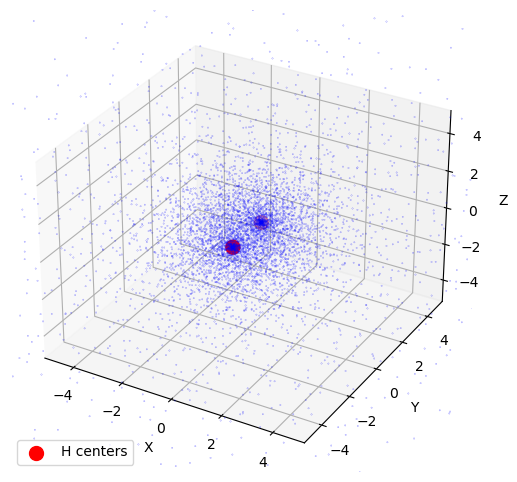

In [30]:
import matplotlib.pyplot as plt

# setting up the molecular grid
mol_grid = MolGrid.from_preset(
    atnums=atnums,          # The atomic numbers of Formaldehyde
    atcoords=atcoords,      # The atomic coordinates of Formaldehyde
    rgrid=radial_grid,          # Radial grid used to construct atomic grids over each carbon, and hydrogen.
    preset="fine",              # Controls the angular degree. Can be "coarse", "medium", "fine", "veryfine", "ultrafine", "insane".
    aim_weights=BeckeWeights(), # Atom-in molecular weights: Becke weights
    store=True,                 # Stores the individual atomic grids, used for interpolation.
)

# Plotting the grid
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Adjust the limits to fit your data
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_zlim((-5, 5))

# Plotting grid points
ax.scatter(mol_grid.points[:, 0], mol_grid.points[:, 1], mol_grid.points[:, 2], s=0.1, c='b', marker=".")

# Plotting H centers with label
ax.scatter(atcoords[:, 0], atcoords[:, 1], atcoords[:, 2], s=100, c='r', marker="o", label='H centers')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


As shown in the figure. The transformation applied the Gauss-Legendre grid to obtain the radial grid, makes the grid more dense near the nuclei, where the integrand more likely to vary rapidly.

After defining the grid, all we need is a function value on the grid points to integrate it. In this case, we will use the approximate wavefunction of the $\mathrm{H}_{2}^{+}$ system.

##### Simple usage example: $\mathrm{H}_{2}^{+}$ wavefunction.

The $H_{2}^{+}$ wavefunction can be approximated as a linear combination of two hydrogen-like atomic orbitals (1s in this case):

$$\psi^{+}(r) = c_{1s}^a\phi_{1s}(||r - R_A||) + c_{1s}^b\phi_{1s}(||r - R_B||)$$

where $c_1s^a$ and $c_1s^b$ are the coefficients of the linear combination, $R_A$ and $R_B$ are the positions of the nuclei $a$ and $b$, and $\psi_{1s}^a$ and $\psi_{1s}^b$ are the hydrogen-like (1s) atomic orbitals:

$$\phi_{1s}(r) = \frac{1}{\sqrt{\pi}}e^{-r}$$

For the bonding solution, the coefficients correspond to a normalization constant and are given by:

$$c_1s^a = c_1s^b = \left(\int \psi^2(r) dr\right)^{-1/2}= \frac{1}{\sqrt{2 + 2 S_{ab}}}$$

$S_{ab}$ is the overlap integral between the two atomic orbitals and its analytical expression is:

$$S_{ab} = \int \phi_{1s}(||r - R_A||) \phi_{1s}(||r - R_B||) dr =  e^{-R} \left(1 + R + \frac{R^2}{3}\right)$$

where $R$ is the internuclear distance in atomic units.


Here we showcase the use of grid package by performing the numerical integration of $S_{ab}$, $c_1s^a$ and $c_1s^b$. and comparing the results with the analytical expressions.

In [31]:
import numpy as np

R = np.linalg.norm(atcoords[0] - atcoords[1])

# defining 1s orbital values on the grid
s1_a_vals = np.sqrt(1/np.pi) * np.exp(-np.linalg.norm(mol_grid.points - atcoords[0], axis=1))
s1_b_vals = np.sqrt(1/np.pi) * np.exp(-np.linalg.norm(mol_grid.points - atcoords[1], axis=1))

# Calculating the overlap integral
S_ab = np.exp(-R) * (1 + R + R**2/3)    # analytical overlap integral
S_ab_num = mol_grid.integrate(s1_a_vals * s1_b_vals)   # numerical overlap integral using the grid
print(f"The analytical overlap integral is {S_ab} and is close to the numerical {S_ab_num}")

# Calculating normalization constant
N = 1 / np.sqrt(2 + 2 * S_ab)   # analytical 
numer_N = 1/np.sqrt(mol_grid.integrate((s1_a_vals + s1_b_vals)**2))  # numerical 

print(f"The analytical normalization constant is {N} and is close to the numerical {numer_N}")

# defining the wavefunction values on the grid
psi_vals = numer_N * (s1_a_vals + s1_b_vals)

# Calculating the electron density
rho_vals = psi_vals**2
Nelectron = mol_grid.integrate(rho_vals)
print(f"The integral of electron density across all space {Nelectron} should be close to 1")

The analytical overlap integral is 0.5864528940253216 and is close to the numerical 0.5864528869452882
The analytical normalization constant is 0.5613987115061903 and is close to the numerical 0.5613987044473437
The integral of electron density across all space 1.000000000000001 should be close to 1


Also, given that the values of a function are known for the grid points, the grid can be used to interpolate the function at any point in space. In this example, we will use the grid to interpolate the electron density of the $\mathrm{H}_{2}^{+}$ system.

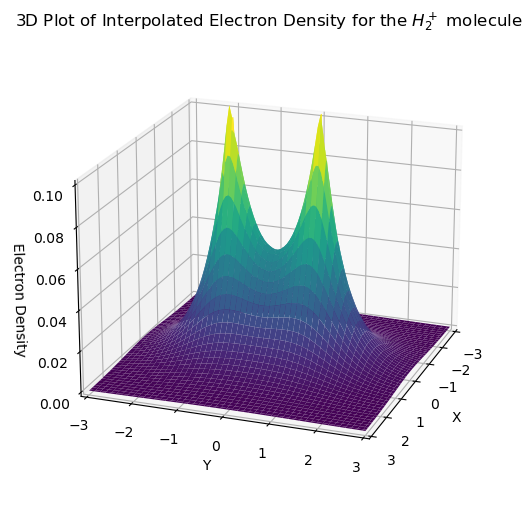

In [32]:
# Extracting the interpolated electron density for the plane z=0
interpolated_rho = mol_grid.interpolate(rho_vals)

x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
x_grid = x_grid.flatten()
y_grid = y_grid.flatten()
z_grid = np.zeros_like(x_grid)

# interpolate the rho values on the grid
points = np.array([x_grid, y_grid, z_grid]).T
rho_z0 = interpolated_rho(points=points).reshape(100, 100)

# Creating the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Adjust the limits to fit your data
ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.set_zlim((0, 0.1))

# Plotting the interpolated electron density
ax.plot_surface(x_grid.reshape(100, 100), y_grid.reshape(100, 100), rho_z0, cmap='viridis')

# Change the view angle
ax.view_init(elev=20, azim=20)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Electron Density')

# Add title
ax.set_title('3D Plot of Interpolated Electron Density for the $H_2^+$ molecule')

plt.show()

